<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Data Preprocessing &
AssociaSon Rule Mining
– Part 1</b></center>
<center><b><h1>Meet Parmar | 23010101191 | 23/06/2025</b></center>
<pre>

In [11]:
# 1. Import pandas and load the dataset. Show first 5 rows.
import pandas as pd

df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
# 2. Display the total number of missing values in each column.
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# 3. Drop all rows that contain any missing value. Show shape before and after.
print("Before:", df.shape)
df_cleaned = df.dropna()
print("After:", df_cleaned.shape)


Before: (541909, 8)
After: (406829, 8)


In [15]:
# 4. Fill missing values in the 'Description' column using the mode.
df['Description'].fillna(df['Description'].mode()[0])


0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [17]:
# 5. Fill missing values in 'CustomerID' using the median.
df['CustomerID'].fillna(df['CustomerID'].median())


0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [39]:
# 6. Apply forward fill on the 'CustomerID' column.
df['CustomerID'].fillna(df['CustomerID'].median())


Invoice_ID
536365    17850
536365    17850
536365    17850
536365    17850
536365    17850
          ...  
581587    12680
581587    12680
581587    12680
581587    12680
581587    12680
Name: CustomerID, Length: 527390, dtype: int64

In [19]:
# 7. Display the data types of all columns.
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [20]:
# 8. Convert 'CustomerID' to integer data type.
df['CustomerID'] = df['CustomerID'].astype(int)


In [21]:
# 9. Convert 'InvoiceDate' column to datetime.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
# 10. Remove leading and trailing whitespace in 'Description'.
df['Description'] = df['Description'].str.strip()


In [23]:
# 11. Count the number of unique values in the 'Country' column.
df['Country'].nunique()


38

In [40]:
# 12. Convert all text in 'Description' column to uppercase.
df['Description'] = df['Description'].str.upper()



In [43]:
# 13. Label encode the 'Country' column using category codes.
df['Country'] = df['Country'].astype('category')
df['Country_Code'] = df['Country'].cat.codes


In [44]:
# 14. Count how many transactions occurred from each country.
country_counts = df['Country'].value_counts()
country_counts.head()



Country
United Kingdom    482479
Germany             9027
France              8393
EIRE                7883
Spain               2480
Name: count, dtype: int64

In [27]:
# 15. Create a new column 'TotalPrice' = Quantity × UnitPrice.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [28]:
# 16. Extract Year, Month, and Day from 'InvoiceDate'.
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


In [46]:
# 17. Bin 'UnitPrice' into 4 categories using pd.cut().
df['Price_Level'] = pd.cut(df['UnitPrice'], bins=4, labels=["Low", "Medium", "High", "Very High"])

In [30]:
# 18. Remove all duplicate rows from the DataFrame.
df = df.drop_duplicates()


In [31]:
# 19. Replace Quantity==0 with NaN, then fill with median.
df['Quantity'] = df['Quantity'].replace(0, pd.NA)
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_26400\1613992588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)


In [32]:
# 20. Drop rows where 'InvoiceNo' starts with 'C'.
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


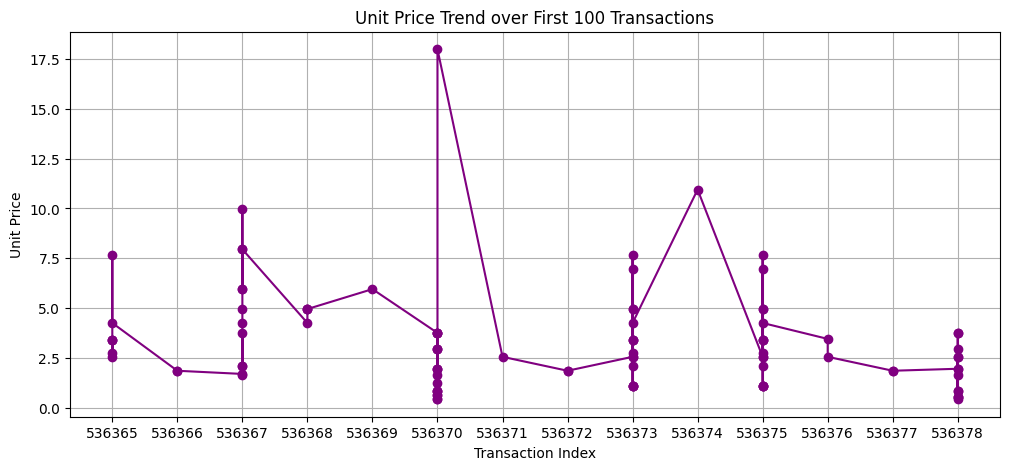

In [51]:
# 19. Plot the UnitPrice trend over the first 100 transactions using a line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['UnitPrice'].head(100), color='purple', marker='o', linestyle='-')
plt.title('Unit Price Trend over First 100 Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()


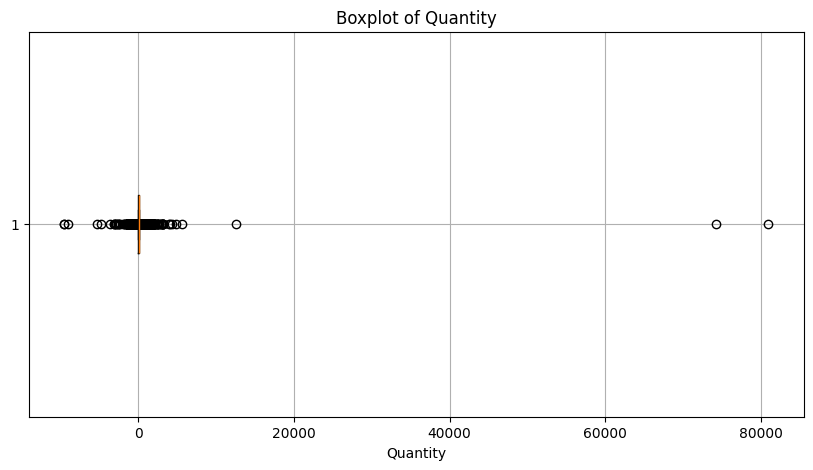

In [47]:
# 18. Plot a boxplot of the 'Quantity' column using matplotlib to detect outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(df['Quantity'], vert=False)
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.grid(True)
plt.show()



In [35]:
# 23. Rename 'InvoiceNo' to 'Invoice_ID' and 'StockCode' to 'Product_Code'.
df.rename(columns={'InvoiceNo': 'Invoice_ID', 'StockCode': 'Product_Code'}, inplace=True)


In [36]:
# 24. Reset the DataFrame index after cleaning.
df = df.reset_index(drop=True)


In [37]:
# 25. Set 'Invoice_ID' as the index of the DataFrame.
df.set_index('Invoice_ID', inplace=True)
